# Домашнее задание №7 к лекции «Ансамблирование»

1. Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет www.kaggle.com...iques/data (train.csv)
2. Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей
3. Построить случайный лес, вывести важность признаков
4. Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
5. Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии
6. Показать, что использование ансамблей моделей действительно улучшает качество (стекинг vs другие модели сравнивать на hold-out)
7. В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import matplotlib.font_manager 
%matplotlib inline
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [32]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
X = data.drop('SalePrice', axis=1).select_dtypes(include=[np.number]).fillna(0)
y = data['SalePrice']

In [66]:
# Используем модель "Случайный лес"
model_RFR = RandomForestRegressor(n_estimators = 10, random_state = 1)

In [76]:
X_tr, X_t, Y_tr, Y_t = train_test_split(X, y, test_size = 0.20, shuffle = True, random_state = 42)
model_RFR.fit(X_tr, Y_tr)
r2_score_1 = r2_score(Y_t, model_RFR.predict(X_t))
r2_score_1

0.8568602952282305

In [110]:
# Используем 10-fold кросс-валидацию для оценки качества моделей
scores = cross_val_score(model_RFR, X, y, cv = 10, scoring = None)
scores

array([0.83770045, 0.89178151, 0.88858969, 0.74284581, 0.87606437,
       0.89783121, 0.85710399, 0.88116425, 0.64133121, 0.8309283 ])

In [109]:
scores.mean()

0.8307303051414856

In [88]:
# Выведем важность признаков. 
imp = pd.Series(model_RFR.feature_importances_)
imp.sort_values(ascending=False)

4     0.562838
16    0.136757
14    0.047860
9     0.036265
13    0.028771
12    0.027410
27    0.019963
3     0.019518
6     0.019069
2     0.011019
7     0.009482
26    0.007002
25    0.006905
29    0.006760
8     0.006679
0     0.006527
28    0.006452
23    0.005647
5     0.004434
11    0.003876
32    0.003652
1     0.003150
19    0.003056
24    0.002830
35    0.002507
36    0.002383
17    0.001902
21    0.001728
10    0.001598
30    0.001197
20    0.000835
22    0.000826
33    0.000740
15    0.000194
31    0.000076
18    0.000048
34    0.000044
dtype: float64

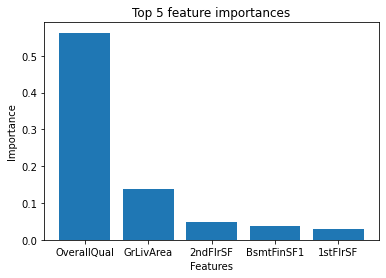

In [91]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

In [98]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [99]:
# Создаем стэккинг и обучаем его на наших данных 

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [100]:
Regressor.fit(X_tr, Y_tr)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [114]:
# Посмотрим какие получились результаты

print(f'Score on train data {Regressor.score(X_tr, Y_tr)}')
print(f'Score on test data {Regressor.score(X_t, Y_t)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_tr, Y_tr)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_t, Y_t)}')

Score on train data 0.9074525220607292
Score on test data 0.8570125533433619
Score on train data with model LinearRegression 0.8094155206551796
Score on test data with model LinearRegression 0.8300774043836032
Score on train data with model KNeighborsRegressor 0.7492195428177956
Score on test data with model KNeighborsRegressor 0.6874169310350912
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7910947370074115


Лучше всего справилась Линейная Регрессия - результат на тесте 0.83.

Результат метамодели - 0.85. Лучше, чем результат любого из базовых.